# Assignment 3

The assignment 3 contains 2 questions and the due date is April 24th (Sunday) 23:59PM.

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix 
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">
The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [5]:
x_train.shape

(50000, 32, 32, 3)

You can visually check a random image:

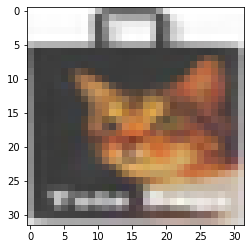

In [6]:
plt.imshow(x_train[3000])

We can also check the image at each of three channels:

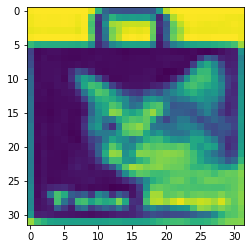

In [7]:
plt.imshow(x_train[3000][:, :, 0])

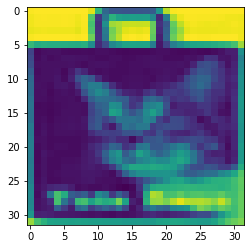

In [8]:
plt.imshow(x_train[3000][:, :, 1])

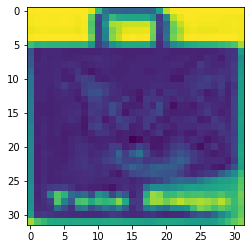

In [9]:
plt.imshow(x_train[3000][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

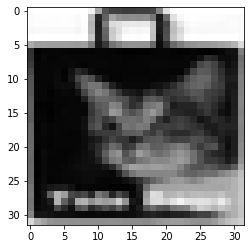

In [10]:
R, G, B = x_train[3000][:,:,0], x_train[3000][:,:,1], x_train[3000][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

### Question 1.2 (15 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
x_train_grey_scale = 0.2989 * x_train[:,:,:,0] + 0.5870 * x_train[:,:,:,1] + 0.1140 * x_train[:,:,:,2]

In [13]:
x_train_grey_scale.shape

(50000, 32, 32)

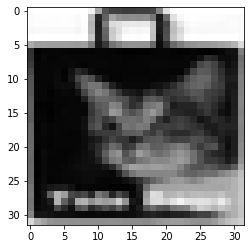

In [14]:
plt.imshow(x_train_grey_scale[3000], cmap='gray')

In [15]:
def plot_digits(instances, images_per_row=5, **options):
    size = 32
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [16]:
from sklearn.decomposition import PCA

In [17]:
print(x_train_grey_scale.shape)

(50000, 32, 32)


In [18]:
xtgs_rs = np.reshape(x_train_grey_scale, (50000, 1024))
print(xtgs_rs.shape)

(50000, 1024)


In [19]:
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(xtgs_rs)

In [20]:
pca = PCA(n_components = 256)
X_reduced = pca.fit_transform(xtgs_rs)
X_recovered = pca.inverse_transform(X_reduced)

In [21]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [22]:
X_recovered_r = X_recovered.reshape(X_recovered.shape[0],int(X_recovered.shape[1]**0.5), int(X_recovered.shape[1]**0.5))
X_recovered_r.shape

(50000, 32, 32)

Text(0.5, 1.0, 'Compressed')

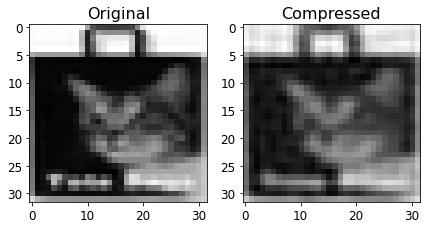

In [23]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original", fontsize=16)
plt.subplot(122)
plt.imshow(X_recovered_r[3000], cmap='gray')
plt.title("Compressed", fontsize=16)

Text(0.5, 1.0, 'Compressed')

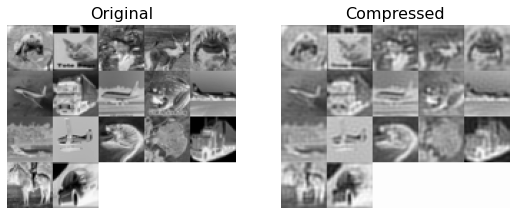

In [24]:
plt.figure(figsize=(9, 5))
plt.subplot(121)
plot_digits(x_train_grey_scale[::3000])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::3000])
plt.title("Compressed", fontsize=16)

### Question 1.3 (15 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Expalin your findings.

In [25]:
from sklearn.decomposition import PCA

In [26]:
print(x_train_grey_scale.shape)

(50000, 32, 32)


In [27]:
xtgs_rs = np.reshape(x_train_grey_scale, (50000, 1024))
print(xtgs_rs.shape)

(50000, 1024)


In [28]:
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(xtgs_rs)

In [29]:
pca.n_components_

76

In [30]:
np.sum(pca.explained_variance_ratio_)

0.9000141118202037

In [31]:
pca = PCA(n_components = 76)
X_reduced = pca.fit_transform(xtgs_rs)
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
X_recovered_r = X_recovered.reshape(X_recovered.shape[0],int(X_recovered.shape[1]**0.5), int(X_recovered.shape[1]**0.5))
X_recovered_r.shape

(50000, 32, 32)

In [33]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [34]:
def plot_digits(instances, images_per_row=5, **options):
    size = 32
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

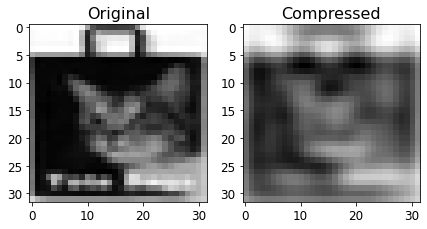

In [35]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original", fontsize=16)
plt.subplot(122)
plt.imshow(X_recovered_r[3000], cmap='gray')
plt.title("Compressed", fontsize=16)

Text(0.5, 1.0, 'Compressed')

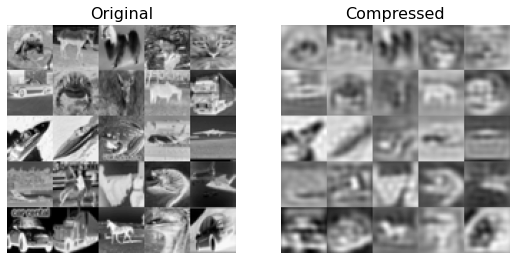

In [36]:
plt.figure(figsize=(9, 5))
plt.subplot(121)
plot_digits(x_train_grey_scale[::2000])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2000])
plt.title("Compressed", fontsize=16)

(explain your findings)

### Question 1.4 (15 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [38]:
y_train_encoded

array([6, 9, 9, ..., 9, 1, 1], dtype=int64)

In [39]:
pca = PCA(n_components= 0.9, whiten=True)
pca.fit(xtgs_rs)
transform_pca = pca.transform(xtgs_rs)
inv_trans_pca = pca.inverse_transform(transform_pca)

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg = LogisticRegression()
log_reg.fit(inv_trans_pca, y_train_encoded)
log_reg.predict(inv_trans_pca)

array([1, 1, 9, ..., 9, 8, 9], dtype=int64)

In [41]:
from sklearn.model_selection import cross_validate
cv = cross_validate(log_reg, inv_trans_pca, y_train_encoded, cv=5, scoring="f1_macro")
cv

{'fit_time': array([12.36559057, 12.66127133, 12.96956348, 13.46725583, 13.37426043]),
 'score_time': array([0.03124833, 0.05047584, 0.04687333, 0.03120255, 0.04689264]),
 'test_score': array([0.29005421, 0.27248825, 0.284974  , 0.27933079, 0.28063046])}

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings. 

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

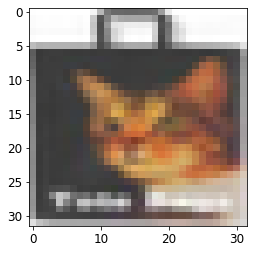

In [42]:
cat_image = x_train[3000]
plt.imshow(cat_image)

In [43]:
from sklearn.cluster import KMeans

n_colors = 32
w,h,_ = cat_image.shape
sample = cat_image.reshape(w*h,3)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample)

In [44]:
labels = kmeans.predict(sample)
labels

array([19, 19, 19, ..., 24,  7,  7])

In [45]:
palette = np.array(kmeans.cluster_centers_).astype(int)
palette

array([[249, 249, 249],
       [ 92,  71,  59],
       [167, 165, 165],
       [186, 132,  78],
       [142,  82,  62],
       [ 59,  59,  59],
       [122, 118, 117],
       [214, 209, 205],
       [212, 166, 103],
       [104, 101, 101],
       [170, 116,  72],
       [202, 181, 156],
       [153, 152, 151],
       [174,  99,  61],
       [104,  72,  61],
       [178, 178, 178],
       [205, 127,  67],
       [136, 134, 133],
       [119,  77,  60],
       [254, 254, 254],
       [ 66,  64,  66],
       [232, 230, 227],
       [194, 107,  59],
       [130,  94,  65],
       [206, 195, 184],
       [ 82,  77,  77],
       [204, 151,  83],
       [186, 166, 158],
       [150, 107,  71],
       [ 77,  64,  59],
       [156,  88,  59],
       [193, 192, 192]])

In [46]:
np.array(kmeans.cluster_centers_)

array([[249.58974359, 249.56410256, 249.23076923],
       [ 92.04545455,  71.09090909,  59.54545455],
       [167.52941176, 165.35294118, 165.97058824],
       [186.38095238, 132.61904762,  78.95238095],
       [142.66666667,  82.38095238,  62.23809524],
       [ 59.50684932,  59.74429224,  59.56164384],
       [122.58823529, 118.52941176, 117.64705882],
       [214.19230769, 209.11538462, 205.76923077],
       [212.2       , 166.8       , 103.6       ],
       [104.22727273, 101.27272727, 101.27272727],
       [170.        , 116.94736842,  72.89473684],
       [202.28571429, 181.76190476, 156.38095238],
       [153.32      , 152.24      , 151.44      ],
       [174.66666667,  99.05555556,  61.55555556],
       [104.26666667,  72.83333333,  61.96666667],
       [178.63157895, 178.52631579, 178.52631579],
       [205.2       , 127.05      ,  67.6       ],
       [136.07692308, 134.80769231, 133.92307692],
       [119.51515152,  77.90909091,  60.78787879],
       [254.125     , 254.125  

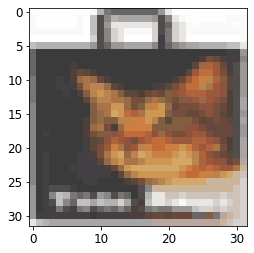

In [47]:
recolored = np.copy(sample)
for index in range(len(recolored)):
    recolored[index] = palette[labels[index]]
    
recolored = recolored.reshape(w,h,3)
plt.imshow(recolored)

## Question 2 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


In [48]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

In [49]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [50]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [51]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [52]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

In [53]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


### Question 2.1 (20 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score. 



In [54]:
movies_tags = movies.merge(tags, on = 'movieId', how = 'left')
movies_tags

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,567.0,fun,1.525286e+09
3,2,Jumanji (1995),Adventure Children Fantasy,62.0,fantasy,1.528844e+09
4,2,Jumanji (1995),Adventure Children Fantasy,62.0,magic board game,1.528844e+09
...,...,...,...,...,...,...
11827,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,NaN,NaN,NaN
11828,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,NaN,NaN,NaN
11829,193585,Flint (2017),Drama,NaN,NaN,NaN
11830,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,NaN,NaN,NaN


In [55]:
movies_tags.drop(['userId','timestamp'], axis=1, inplace=True)
movies_tags

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,fun
3,2,Jumanji (1995),Adventure Children Fantasy,fantasy
4,2,Jumanji (1995),Adventure Children Fantasy,magic board game
...,...,...,...,...
11827,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,NaN
11828,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,NaN
11829,193585,Flint (2017),Drama,NaN
11830,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,NaN


In [56]:
movies_tags['movieId'] = movies_tags['movieId'].astype('str')

In [57]:
movies_tags = movies_tags.groupby(['movieId','title','genres'])['tag'].apply(set).reset_index()
movies_tags

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,"{pixar, fun}"
1,10,GoldenEye (1995),Action Adventure Thriller,{nan}
2,100,City Hall (1996),Drama Thriller,{nan}
3,100044,Human Planet (2011),Documentary,{nan}
4,100068,Comme un chef (2012),Comedy,{nan}
...,...,...,...,...
9719,99853,Codependent Lesbian Space Alien Seeks Same (2011),Comedy Romance Sci-Fi,{nan}
9720,999,2 Days in the Valley (1996),Crime Film-Noir,{nan}
9721,99910,"Last Stand, The (2013)",Action Crime Thriller,{nan}
9722,99917,Upstream Color (2013),Romance Sci-Fi Thriller,"{artistic, atmospheric, existentialism, artsy,..."


In [58]:
movies_tags['tag']=movies_tags['tag'].agg(lambda x: ' '.join(map(str,x)))

In [59]:
movies_tags['tag']=movies_tags['tag'].replace('nan','')

In [60]:
movies_tags['metadata'] = movies_tags['genres'] + ' ' + movies_tags['tag']
movies_tags

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar fun,Adventure Animation Children Comedy Fantasy pi...
1,10,GoldenEye (1995),Action Adventure Thriller,,Action Adventure Thriller
2,100,City Hall (1996),Drama Thriller,,Drama Thriller
3,100044,Human Planet (2011),Documentary,,Documentary
4,100068,Comme un chef (2012),Comedy,,Comedy
...,...,...,...,...,...
9719,99853,Codependent Lesbian Space Alien Seeks Same (2011),Comedy Romance Sci-Fi,,Comedy Romance Sci-Fi
9720,999,2 Days in the Valley (1996),Crime Film-Noir,,Crime Film-Noir
9721,99910,"Last Stand, The (2013)",Action Crime Thriller,,Action Crime Thriller
9722,99917,Upstream Color (2013),Romance Sci-Fi Thriller,artistic atmospheric existentialism artsy Beau...,Romance Sci-Fi Thriller artistic atmospheric e...


In [61]:
movies_tags = movies_tags.drop('tag', axis = 1)
movies_tags

,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy pi...
1,10,GoldenEye (1995),Action Adventure Thriller,Action Adventure Thriller
2,100,City Hall (1996),Drama Thriller,Drama Thriller
3,100044,Human Planet (2011),Documentary,Documentary
4,100068,Comme un chef (2012),Comedy,Comedy
...,...,...,...,...
9719,99853,Codependent Lesbian Space Alien Seeks Same (2011),Comedy Romance Sci-Fi,Comedy Romance Sci-Fi
9720,999,2 Days in the Valley (1996),Crime Film-Noir,Crime Film-Noir
9721,99910,"Last Stand, The (2013)",Action Crime Thriller,Action Crime Thriller
9722,99917,Upstream Color (2013),Romance Sci-Fi Thriller,Romance Sci-Fi Thriller artistic atmospheric e...


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [63]:
metadata = movies_tags['metadata']

In [64]:
vectorizer = CountVectorizer().fit(metadata)
X = vectorizer.transform(metadata)
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
X.toarray().shape

(9724, 1746)

In [66]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42).fit_transform(X)

In [67]:
svd

array([[ 0.90131302,  1.00232855,  0.61534864, ..., -0.0050281 ,
         0.00378348,  0.00937476],
       [ 0.6482242 , -0.45745594,  1.01969798, ..., -0.00401982,
         0.00248244, -0.00364205],
       [ 0.90033928, -0.75572514, -0.24692153, ..., -0.00254229,
         0.00155829, -0.00183496],
       ...,
       [ 0.67364795, -0.59065295,  0.76921502, ...,  0.00263633,
         0.00274378, -0.00506265],
       [ 0.75108653, -0.37849207,  0.82836901, ...,  0.19216353,
        -0.25931787,  0.14215956],
       [ 1.08240095, -0.87448013, -0.20015998, ...,  0.00234211,
         0.00291879, -0.0073069 ]])

In [68]:
print(svd.shape)

(9724, 50)


In [69]:
movies_tags[movies_tags['title'] == 'Toy Story (1995)']

,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy pi...


In [70]:
toy = svd[0]
toy.shape

(50,)

In [71]:
from scipy import spatial
cs = []

for i in svd:
    #cosine = np.dot(toy,i)/(norm(toy)*norm(i))
    cosine = spatial.distance.cosine(toy,i)
    cs.append(cosine)

In [72]:
len(cs)

9724

In [73]:
#print(cs)

In [74]:
cs10 = np.argsort(cs)[:11]
cs10

array([   0, 4568, 4824,  173, 2723, 1895, 5348, 9326, 7388, 6190, 1158],
      dtype=int64)

In [75]:
moviestop10 = movies_tags.iloc[cs10]
moviestop10 = moviestop10.iloc[1:]
moviestop10.head(10)

,movieId,title,genres,metadata
4568,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
4824,4016,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
173,103755,Turbo (2013),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
2723,2294,Antz (1998),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
1895,166461,Moana (2016),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
5348,45074,"Wild, The (2006)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
9326,91355,Asterix and the Vikings (Astérix et les Viking...,Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
7388,65577,"Tale of Despereaux, The (2008)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
6190,53121,Shrek the Third (2007),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy
1158,136016,The Good Dinosaur (2015),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy


### Question 2.2 (15 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings. 




In [76]:
#limit ratings to user ratings that have rated more that 55 movies -- 
#Otherwise it becomes impossible to pivot the rating dataframe later for collaborative filtering.
filtered_ratings = ratings.groupby('userId').filter(lambda x: len(x) >= 55)
movie_list_rating = filtered_ratings.movieId.unique().tolist()

In [77]:
#we have kept 99% of the original movie titles in ratings data frame
len(filtered_ratings.movieId.unique())/len(movies.movieId.unique()) * 100

98.98190045248869

In [78]:
# but only 59% of the users 
len(filtered_ratings.userId.unique())/len(ratings.userId.unique()) * 100

59.67213114754099

In [79]:
#filter the movies data frame
movies = movies[movies.movieId.isin(movie_list_rating)]

In [80]:
movies_ratings_f = pd.merge(movies[['movieId']], filtered_ratings, on="movieId", how="right")

In [81]:
movies_ratings_fna = movies_ratings_f.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)

In [82]:
movies_ratings_fna.head(3)

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [83]:
len(filtered_ratings.movieId.unique())

9625

In [84]:
movies_tags = pd.merge(movies, tags, on='movieId', how='left')

In [85]:
movies_tags.fillna("", inplace=True)
movies_tags = pd.DataFrame(movies_tags.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))
final = pd.merge(movies, movies_tags, on='movieId', how='left')
final['metadata'] = final[['tag', 'genres']].apply(lambda x: ' '.join(x), axis = 1)

In [86]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50)
latent_matrix_22 = svd.fit_transform(movies_ratings_fna)
latent_matrix_22_df = pd.DataFrame(latent_matrix_22,index=final.title.tolist())

In [87]:
latent_matrix_22_df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Toy Story (1995),36.391240,-4.958788,14.331813,1.844140,-3.077989,-1.351097,8.341198,-0.560336,-1.898607,1.660201,...,-2.419973,3.770834,0.126783,-2.208251,-0.185777,-4.590167,1.481465,-1.375480,-4.686271,0.491246
Jumanji (1995),20.447499,0.675230,11.354473,-7.325467,-3.505236,3.585649,4.393581,-5.564893,0.433335,0.349996,...,-1.823277,-1.885907,-2.694188,-3.784823,2.216881,-0.739244,-0.217368,2.298340,0.882403,3.712845
Grumpier Old Men (1995),8.407816,-5.190801,4.378297,-6.189052,-0.333208,1.924112,-1.548129,0.796425,-3.195887,2.121315,...,1.473615,-1.655179,-0.957434,0.342010,-0.877165,1.593334,1.582914,-0.928663,-0.245159,-2.483912
Waiting to Exhale (1995),0.408037,-0.664700,0.739902,-0.202675,-0.498380,1.055390,0.184035,-0.508339,-0.429567,0.086257,...,0.385098,-0.146118,0.438691,-0.317154,-0.295575,0.373994,-0.090865,-0.213150,0.225617,-0.192492


In [88]:
toy = latent_matrix_22[0]

In [89]:
from scipy import spatial
cs = []

for i in latent_matrix_22:
    #cosine = np.dot(toy,i)/(norm(toy)*norm(i))
    cosine = spatial.distance.cosine(toy,i)
    cs.append(cosine)

In [90]:
cs10 = np.argsort(cs)[:11]
cs10

array([   0,  415,  311,  503, 2329,  120,  887,  951,  501,  956,  319],
      dtype=int64)

In [91]:
moviestop10 = movies.iloc[cs10]
moviestop10 = moviestop10.iloc[1:]
moviestop10.head(10)

,movieId,title,genres
418,480,Jurassic Park (1993),Action Adventure Sci-Fi Thriller
314,356,Forrest Gump (1994),Comedy Drama Romance War
506,588,Aladdin (1992),Adventure Animation Children Comedy Musical
2355,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy
123,150,Apollo 13 (1995),Adventure Drama IMAX
900,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action Adventure
964,1265,Groundhog Day (1993),Comedy Fantasy Romance
504,586,Home Alone (1990),Children Comedy
969,1270,Back to the Future (1985),Adventure Comedy Sci-Fi
322,364,"Lion King, The (1994)",Adventure Animation Children Drama Musical IMAX


### Question 2.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=final.index.tolist())
print(tfidf_df.shape)

(9625, 1675)


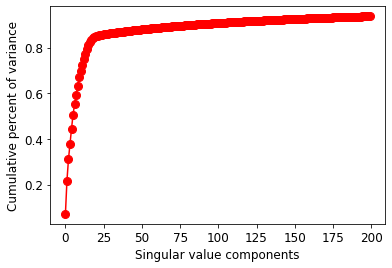

In [93]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_23 = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [94]:
n = 50
latent_matrix_23_df = pd.DataFrame(latent_matrix_23[:,0:n], index=final.title.tolist())

In [97]:
from sklearn.metrics.pairwise import cosine_similarity
# latent vectors for Toy Story (1995) from both content and collaborative matrixes
a1 = np.array(latent_matrix_23_df.loc['Toy Story (1995)']).reshape(1, -1)
a2 = np.array(latent_matrix_22_df.loc['Toy Story (1995)']).reshape(1, -1)

content_score = cosine_similarity(latent_matrix_23_df, a1).reshape(-1)
collab_score = cosine_similarity(latent_matrix_22_df, a2).reshape(-1)

hybrid = ((content_score + collab_score)/2)

dict_df = {'content': content_score , 'collaborative': collab_score, 'hybrid': hybrid} 
similar_movies = pd.DataFrame(dict_df, index = latent_matrix_23_df.index )

print('top 10 by content: \n')

similar_movies.sort_values('content', ascending=False, inplace=True)

print(similar_movies[1:].head(11))

print('\n\n')
print('top 10 by collaborative: \n')

similar_movies.sort_values('collaborative', ascending=False, inplace=True)

print(similar_movies[1:].head(11))

print('\n\n')
print('top 10 by hybrid: \n')

similar_movies.sort_values('hybrid', ascending=False, inplace=True)

print(similar_movies[1:].head(11))

top 10 by content: 

                                                     content  collaborative  \
Moana (2016)                                        0.997312       0.114979   
Wild, The (2006)                                    0.997312       0.218552   
Antz (1998)                                         0.997312       0.568774   
The Good Dinosaur (2015)                            0.997312       0.168966   
Asterix and the Vikings (Astérix et les Vikings...  0.997312       0.095794   
Adventures of Rocky and Bullwinkle, The (2000)      0.997312       0.292675   
Monsters, Inc. (2001)                               0.997312       0.755633   
Shrek the Third (2007)                              0.997312       0.381293   
Tale of Despereaux, The (2008)                      0.997312       0.149387   
Emperor's New Groove, The (2000)                    0.997312       0.485167   
Turbo (2013)                                        0.997312       0.123159   

                              